In [2]:
library(ggplot2)
library(viridis)
library(reshape2)
library(lubridate)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: viridisLite

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [1]:
library(sp)

Warning message:
“package ‘sp’ was built under R version 3.6.2”

In [3]:
d = read.csv("https://raw.githubusercontent.com/data-visualization-society/datavizsociety/master/challenge_data/dvs_challenge_3_membership_anniversary/dvs_challenge_3_membership_anniversary.csv",
            stringsAsFactors = F)

In [4]:
str(d)

'data.frame':	11573 obs. of  6 variables:
 $ lat          : num  37 42.3 42.3 19.1 43.6 ...
 $ long         : num  -122 -83.7 -83.7 72.9 -79.4 ...
 $ data         : num  2.67 2 3.67 3.67 3.33 3 2 2.33 4 4 ...
 $ visualization: num  3.67 3.33 3.33 3.33 3 3 3.67 3.33 3 3.33 ...
 $ society      : num  4.33 4.33 1.33 2.67 3.33 1.67 2.33 2.67 3.33 3 ...
 $ date         : chr  "2/20/2019" "2/20/2019" "2/20/2019" "2/20/2019" ...


In [5]:
d$date = as.Date(d$date, ,format="%m/%d/%Y")

In [6]:
d$week = week(d$date)

In [61]:
head(d)

lat,long,data,visualization,society,date,week
36.97,-122.03,2.67,3.67,4.33,2019-02-20,8
42.28,-83.74,2.00,3.33,4.33,2019-02-20,8
42.28,-83.74,3.67,3.33,1.33,2019-02-20,8
19.08,72.88,3.67,3.33,2.67,2019-02-20,8
43.65,-79.38,3.33,3.00,3.33,2019-02-20,8
39.74,-104.99,3.00,3.00,1.67,2019-02-20,8


Warning message:
“Removed 256 rows containing missing values (geom_point).”

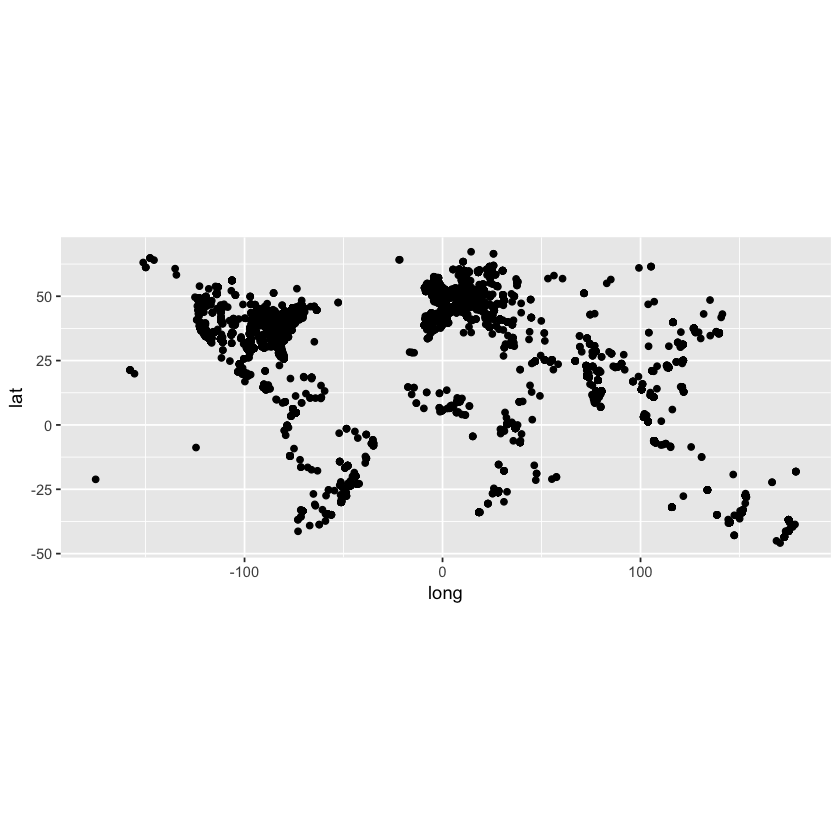

In [22]:
ggplot(data = d)+
geom_point(aes(x=long, y=lat))+
coord_fixed(1.3)

In [23]:
names(d)

[1] "lat"           "long"          "data"          "visualization"
[5] "society"       "date"

In [64]:
d_long = melt(d, id.vars = c("date","lat", "long", "week"))
head(d_long)
summary(d_long)

date,lat,long,week,variable,value
2019-02-20,36.97,-122.03,8,data,2.67
2019-02-20,42.28,-83.74,8,data,2.00
2019-02-20,42.28,-83.74,8,data,3.67
2019-02-20,19.08,72.88,8,data,3.67
2019-02-20,43.65,-79.38,8,data,3.33
2019-02-20,39.74,-104.99,8,data,3.00


      date                 lat              long              week      
 Min.   :2019-02-20   Min.   :-45.88   Min.   :-175.20   Min.   : 1.00  
 1st Qu.:2019-03-04   1st Qu.: 33.75   1st Qu.: -86.91   1st Qu.: 8.00  
 Median :2019-05-21   Median : 40.46   Median : -73.57   Median :13.00  
 Mean   :2019-06-17   Mean   : 34.53   Mean   : -35.36   Mean   :19.66  
 3rd Qu.:2019-09-16   3rd Qu.: 47.56   3rd Qu.:   7.05   3rd Qu.:30.00  
 Max.   :2020-02-18   Max.   : 67.28   Max.   : 178.45   Max.   :53.00  
                      NA's   :768      NA's   :768                      
          variable         value      
 data         :11573   Min.   :0.000  
 visualization:11573   1st Qu.:1.670  
 society      :11573   Median :2.670  
                       Mean   :2.554  
                       3rd Qu.:3.330  
                       Max.   :5.000  
                                      

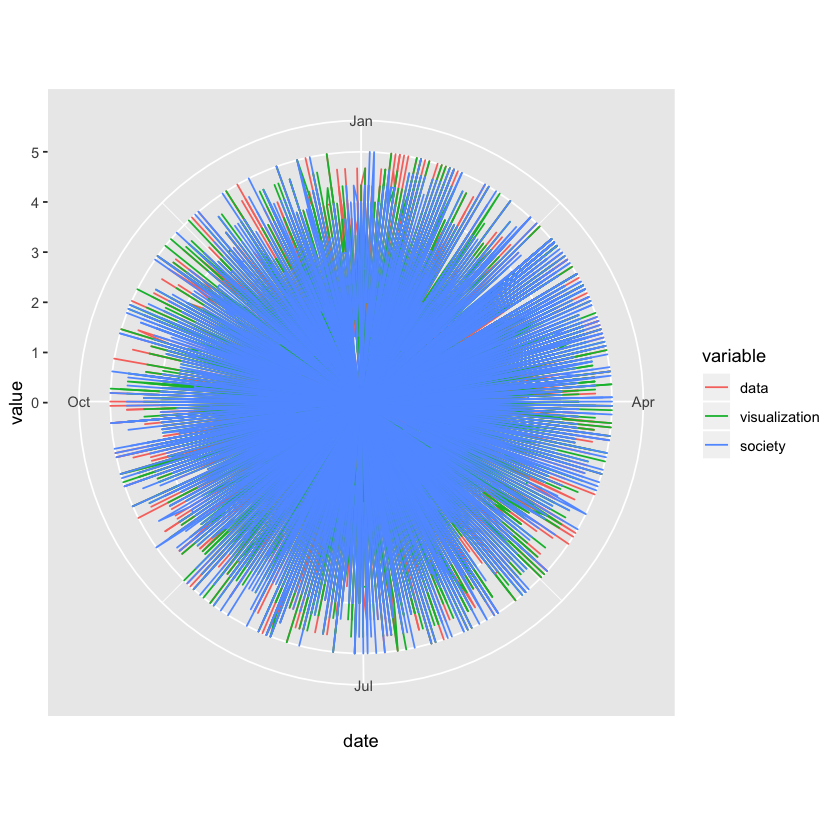

In [28]:
ggplot(data = d_long)+
geom_line(aes(x=date, y=value, colour=variable))+
coord_polar(theta = "x", direction=1 ) 

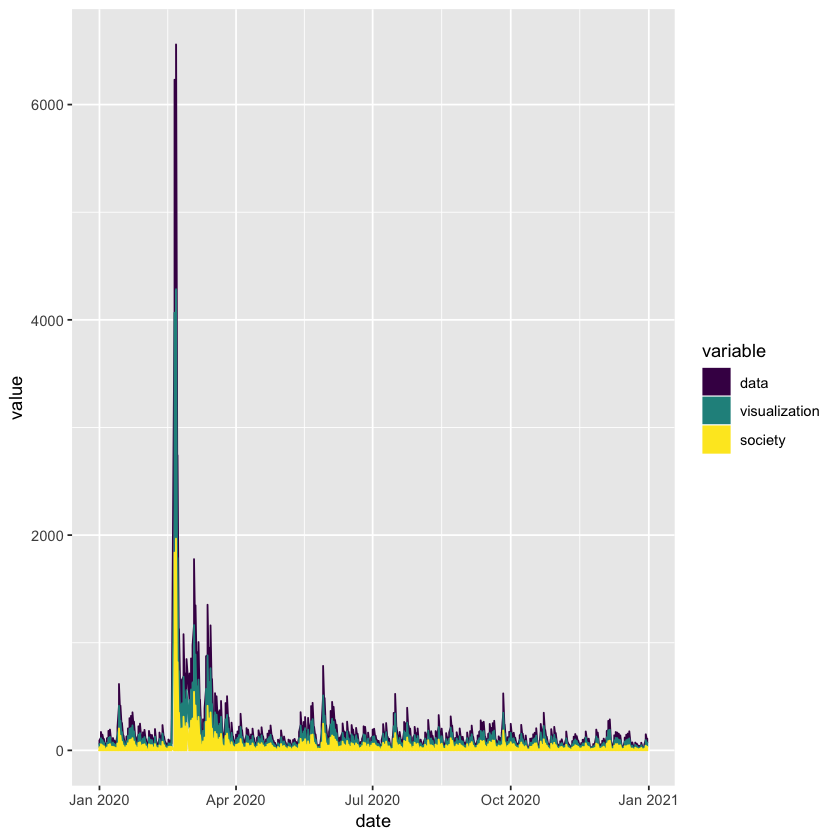

In [42]:
ggplot(data = d_long)+
geom_area(aes(x=date, y=value, colour=variable, fill=variable))+
scale_colour_viridis(discrete = T)+
scale_fill_viridis(discrete = T)


For each week, get the mean and sd of the three describers and then use ribbon. 

In [84]:
d_week = dcast(d_long, formula = week~variable,fun.aggregate = mean)
head(d_week)
d_week_long = melt(d_week, id.var = "week")
head(d_week_long)

week,data,visualization,society
1,2.565169,2.508390,2.228644
2,2.495775,2.513048,2.375829
3,2.502438,2.593831,2.421592
4,2.674528,2.622594,2.411792
5,2.514488,2.538268,2.367165
6,2.382069,2.419052,2.278621


week,variable,value
1,data,2.565169
2,data,2.495775
3,data,2.502438
4,data,2.674528
5,data,2.514488
6,data,2.382069


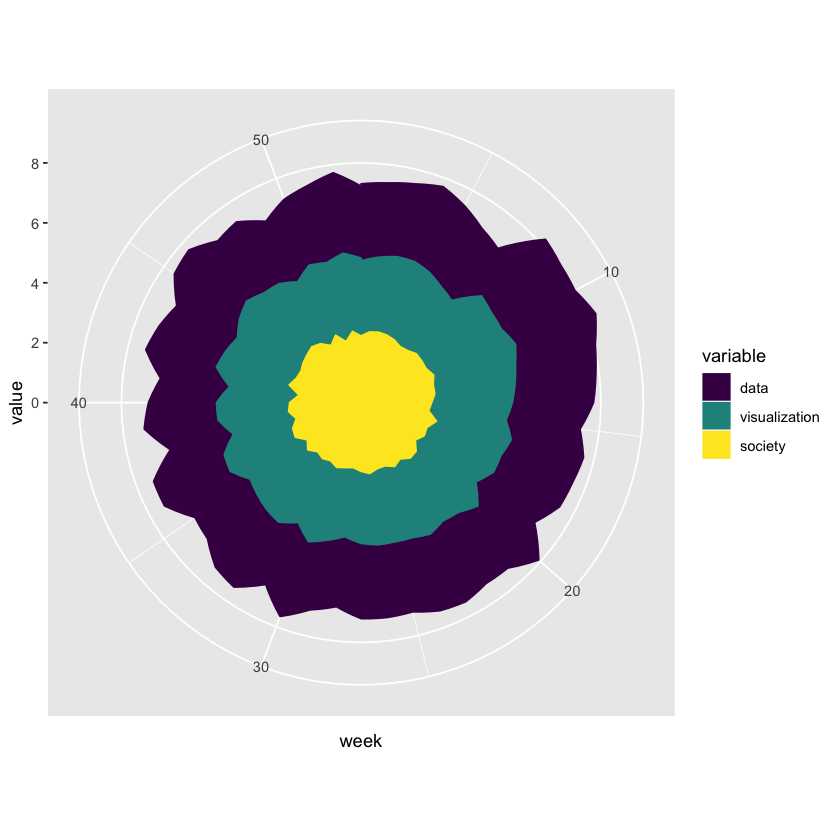

In [72]:
ggplot(data = d_week_long)+
geom_area(aes(x=week, y=value, colour=variable, fill=variable))+
scale_colour_viridis(discrete = T)+
scale_fill_viridis(discrete = T)+
coord_polar(theta = "x", direction=1 ) 
#this should be done with percentages as y axis, to show what is that dominates

In [85]:
d_week_sd = dcast(d_long, formula = week~variable,fun.aggregate = sd)
head(d_week_sd)
d_week_sd_long = melt(d_week_sd, id.var = "week")
head(d_week_sd_long)

week,data,visualization,society
1,1.282413,1.191391,1.338823
2,1.361381,1.278163,1.241187
3,1.346766,1.275007,1.266724
4,1.236043,1.179692,1.298621
5,1.317331,1.111287,1.272591
6,1.199181,1.173070,1.268976


week,variable,value
1,data,1.282413
2,data,1.361381
3,data,1.346766
4,data,1.236043
5,data,1.317331
6,data,1.199181


In [86]:
head(d_week_sd_long)
head(d_week_long)

week,variable,value
1,data,1.282413
2,data,1.361381
3,data,1.346766
4,data,1.236043
5,data,1.317331
6,data,1.199181


week,variable,value
1,data,2.565169
2,data,2.495775
3,data,2.502438
4,data,2.674528
5,data,2.514488
6,data,2.382069


In [87]:
names(d_week_sd_long)=c("week", "variable", "sd")
names(d_week_long)=c("week", "variable", "mean")

In [90]:
d_week_mean_sd=data.frame(d_week_long,sd = d_week_sd_long$sd)

In [91]:
head(d_week_mean_sd)

week,variable,mean,sd
1,data,2.565169,1.282413
2,data,2.495775,1.361381
3,data,2.502438,1.346766
4,data,2.674528,1.236043
5,data,2.514488,1.317331
6,data,2.382069,1.199181


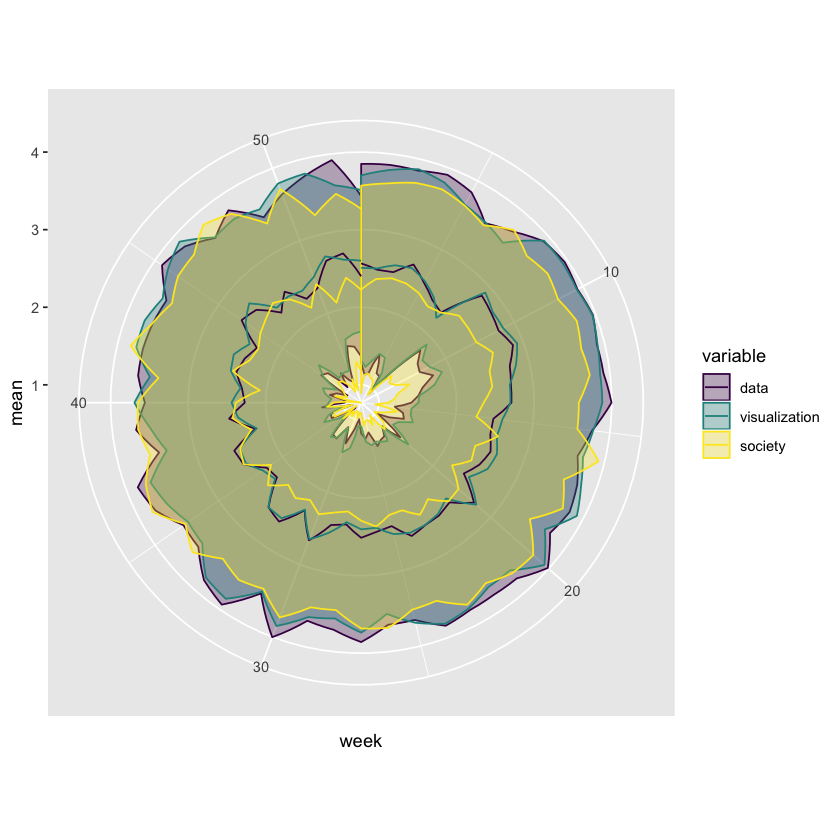

In [94]:
ggplot(data = d_week_mean_sd, aes (x = week))+
geom_ribbon(aes(ymin = mean - sd, ymax = mean + sd, fill = variable, colour=variable), alpha=0.3) +
  geom_line(aes(y = mean,  colour=variable))+
scale_colour_viridis(discrete = T)+
scale_fill_viridis(discrete = T)+
coord_polar(theta = "x", direction=1 ) 

In [97]:
d_week_count = dcast(d_long, formula = week~variable,fun.aggregate = length)
head(d_week_count)
d_week_count_long = melt(d_week_count, id.var = "week")
head(d_week_count_long)


week,data,visualization,society
1,118,118,118
2,187,187,187
3,201,201,201
4,212,212,212
5,127,127,127
6,116,116,116


week,variable,value
1,data,118
2,data,187
3,data,201
4,data,212
5,data,127
6,data,116


In [99]:
d_week_mean_sd_count=data.frame(d_week_long,sd = d_week_sd_long$sd, count = d_week_count_long$value)
head(d_week_mean_sd_count)

week,variable,mean,sd,count
1,data,2.565169,1.282413,118
2,data,2.495775,1.361381,187
3,data,2.502438,1.346766,201
4,data,2.674528,1.236043,212
5,data,2.514488,1.317331,127
6,data,2.382069,1.199181,116


In [ ]:
ggplot(data = d_week_mean_sd_count)+
geom_area(aes(x=week, y=value, colour=variable, fill=variable))+
scale_colour_viridis(discrete = T)+
scale_fill_viridis(discrete = T)+
coord_polar(theta = "x", direction=1 ) 

For each month one line, x axis goes from 1 to 31. For each type of trait 12 lines (the number of months, probably 11 lines)


## Getting the country information in R studio because my lab doesn't want to install `rgdal`
``` {r}
library(rgdal)

d = read.csv("https://raw.githubusercontent.com/data-visualization-society/datavizsociety/master/challenge_data/dvs_challenge_3_membership_anniversary/dvs_challenge_3_membership_anniversary.csv",
             stringsAsFactors = F)
d$date = as.Date(d$date, ,format="%m/%d/%Y")
d$week = week(d$date)

coord = d[,c('long','lat')]
coord = coord[which(!is.na(coord$long)),]
pts = SpatialPoints(coord)

world = readOGR(dsn = "/Users/gretacvega/Documents/GitHub/vizzWork/MOL/country_data" , layer = "gadm36_0")

proj4string(pts) = proj4string(world)
countries = over(pts, world)
coord$GID_0 = as.character(countries$GID_0)
coord$NAME_0 = as.character(countries$NAME_0)
d$GID_0 = NA
d$NAME_0 = NA
d$GID_0[which(!is.na(d$long))]=coord$GID_0
d$NAME_0[which(!is.na(d$long))]=coord$NAME_0

write.csv(d, "/Users/gretacvega/Documents/GitHub/dvs/d_gadm.csv")
```

In [66]:
library(plyr)
library(dplyr)
library(reshape2)
library(tidyr)


Attaching package: ‘tidyr’

The following object is masked from ‘package:reshape2’:

    smiths



In [31]:
d = read.csv("d_gadm.csv")

In [34]:
d$date = as.Date(d$date, ,format="%Y-%m-%d")

In [78]:
d$month = month(d$date)

In [79]:
head(d)

X,lat,long,data,visualization,society,date,week,GID_0,NAME_0,month
1,36.97,-122.03,2.67,3.67,4.33,2019-02-20,8,USA,United States,2
2,42.28,-83.74,2.00,3.33,4.33,2019-02-20,8,USA,United States,2
3,42.28,-83.74,3.67,3.33,1.33,2019-02-20,8,USA,United States,2
4,19.08,72.88,3.67,3.33,2.67,2019-02-20,8,IND,India,2
5,43.65,-79.38,3.33,3.00,3.33,2019-02-20,8,CAN,Canada,2
6,39.74,-104.99,3.00,3.00,1.67,2019-02-20,8,USA,United States,2


Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”

GID_0,count
AFG,2
ARE,19
ARG,65
AUS,298
AUT,45
AZE,1


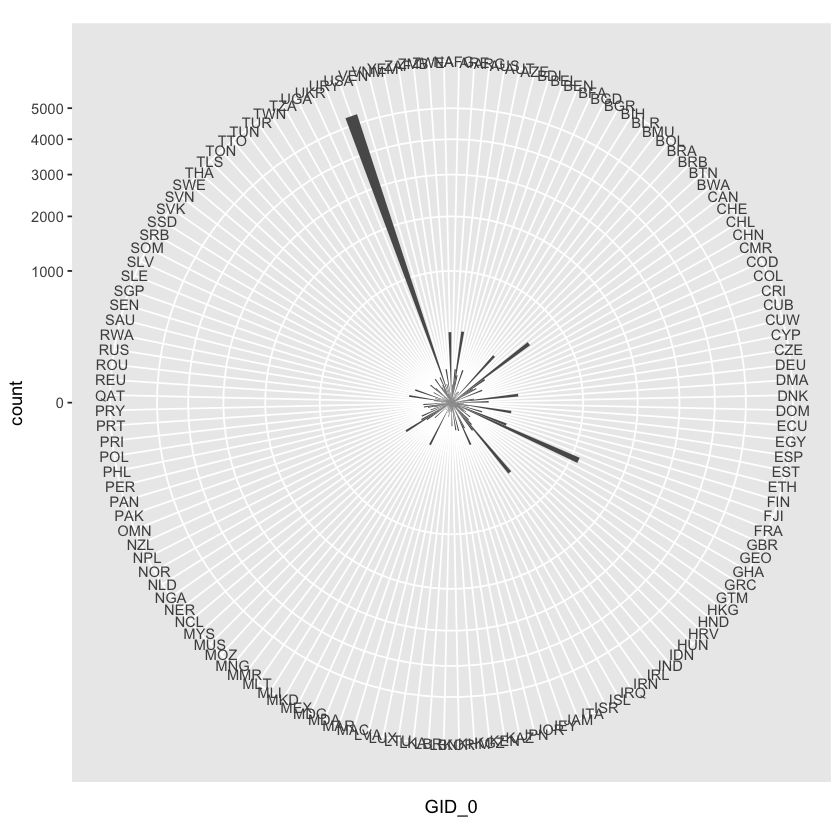

In [88]:
country_count = 
            d %>%
            group_by(GID_0) %>%
            summarize(count=length(GID_0))
head(country_count)
ggplot(country_count)+
    geom_col(aes(x=GID_0, y=count))+
    scale_y_sqrt()+
    coord_polar()

In [155]:
country_count_month = 
            d %>%
            group_by(GID_0, month) %>%
            summarize(count=length(GID_0))
head(country_count_month)

Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”

GID_0,month,count
AFG,2,1
AFG,7,1
ARE,1,2
ARE,2,4
ARE,3,4
ARE,4,1


In [152]:
dim(country_count)

[1] 140   2

In [94]:
d_char = d %>%
        select(-lat, -long) %>%
        gather("character","score", data:society) %>% 
        group_by(X) %>% 
        slice(which.max(score)) %>%
        select(GID_0, month, week, character)
head(d_char)

Adding missing grouping variables: `X`


X,GID_0,month,week,character
1,USA,2,8,society
2,USA,2,8,society
3,USA,2,8,data
4,IND,2,8,data
5,CAN,2,8,data
6,USA,2,8,data


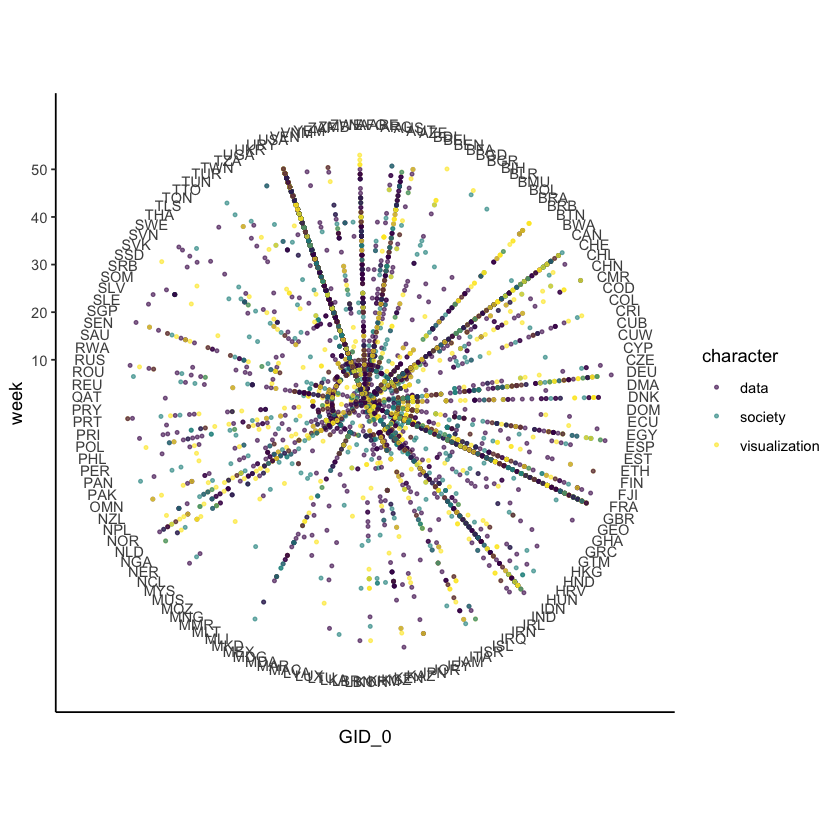

In [108]:
ggplot(d_char)+
    geom_point(aes(x=GID_0, y = week, fill=character, colour=character), alpha = 0.6, shape = 21, size=0.75)+
    scale_fill_viridis(discrete = T)+
    scale_colour_viridis(discrete = T,option = "viridis")+
    theme_classic()+
    coord_polar()

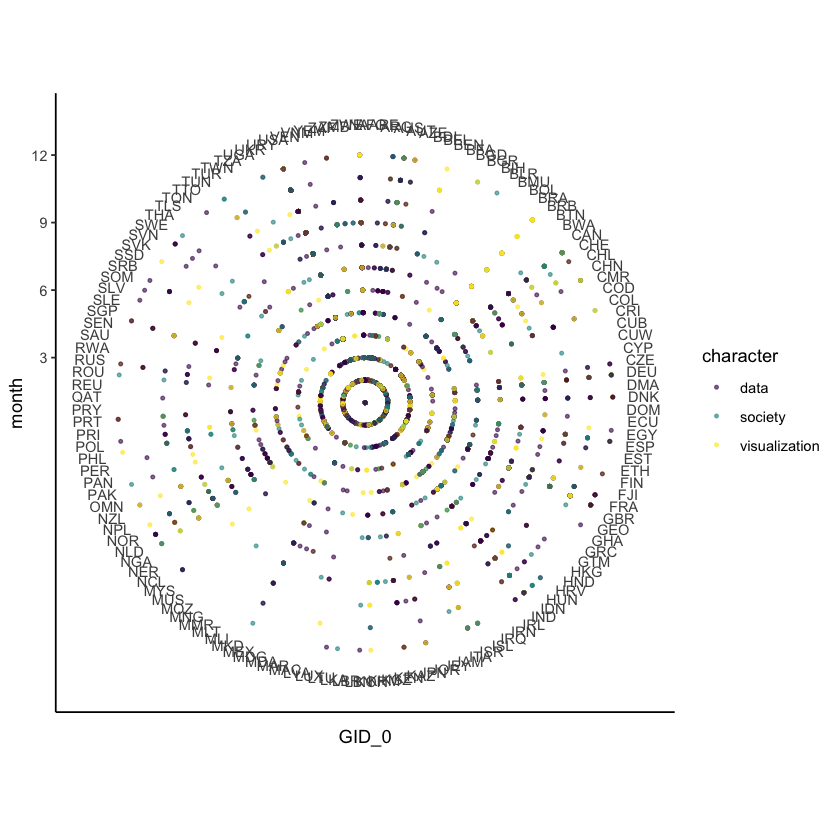

In [153]:
ggplot(d_char)+
    geom_point(aes(x=GID_0, y = month, fill=character, colour=character), alpha = 0.6, shape = 21, size=0.75)+
    scale_fill_viridis(discrete = T)+
    scale_colour_viridis(discrete = T,option = "viridis")+
    theme_classic()+
    coord_polar()

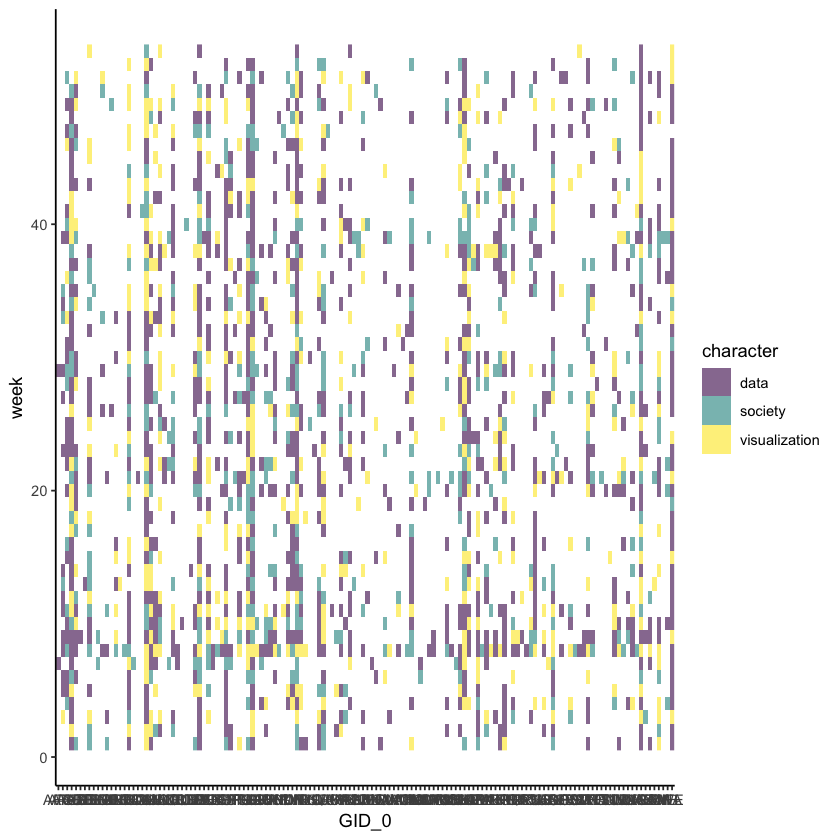

In [112]:
ggplot(d_char)+
    geom_raster(aes(x=GID_0, y = week, fill=character), alpha = 0.6)+
    scale_fill_viridis(discrete = T)+
    scale_colour_viridis(discrete = T,option = "viridis")+
    theme_classic()
    #coord_polar()

In [116]:
d_all = d_char %>%
        select(X, character) %>%
        inner_join(d, by = "X")

In [117]:
head(d_all)

X,character,lat,long,data,visualization,society,date,week,GID_0,NAME_0,month
1,society,36.97,-122.03,2.67,3.67,4.33,2019-02-20,8,USA,United States,2
2,society,42.28,-83.74,2.00,3.33,4.33,2019-02-20,8,USA,United States,2
3,data,42.28,-83.74,3.67,3.33,1.33,2019-02-20,8,USA,United States,2
4,data,19.08,72.88,3.67,3.33,2.67,2019-02-20,8,IND,India,2
5,data,43.65,-79.38,3.33,3.00,3.33,2019-02-20,8,CAN,Canada,2
6,data,39.74,-104.99,3.00,3.00,1.67,2019-02-20,8,USA,United States,2


In [118]:
write.csv(d_all, "d_all.csv")

In [136]:
country_perc = d_all %>%
                group_by(GID_0) %>%
                summarize(data_char=sum(character == "data"),
                         vis_char = sum(character == "visualization"),
                         soc_char = sum(character == "society"),
                         count = length(GID_0))%>%
                mutate(data_perc = (data_char/count)*100, vis_perc = (vis_char/count)*100, soc_perc = (soc_char/count)*100)%>%
                select(GID_0, count, data_perc, vis_perc, soc_perc)

Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”

In [138]:
head(country_perc)
tail(country_perc)

GID_0,count,data_perc,vis_perc,soc_perc
AFG,2,100.00000,0.000000,0.00000
ARE,19,73.68421,5.263158,21.05263
ARG,65,53.84615,20.000000,26.15385
AUS,298,55.03356,24.496644,20.46980
AUT,45,51.11111,22.222222,26.66667
AZE,1,100.00000,0.000000,0.00000


GID_0,count,data_perc,vis_perc,soc_perc
VNM,21,66.66667,14.28571,19.04762
YEM,2,0.00000,50.00000,50.00000
ZAF,66,42.42424,30.30303,27.27273
ZMB,3,66.66667,0.00000,33.33333
ZWE,6,33.33333,0.00000,66.66667
NA,287,65.50523,19.86063,14.63415


In [139]:
write.csv(country_perc, "country_perc.csv")

In [142]:
country_perc_month = d_all %>%
                group_by(GID_0, month) %>%
                summarize(data_char=sum(character == "data"),
                         vis_char = sum(character == "visualization"),
                         soc_char = sum(character == "society"),
                         count = length(GID_0))%>%
                mutate(data_perc = (data_char/count)*100, vis_perc = (vis_char/count)*100, soc_perc = (soc_char/count)*100)%>%
                select(GID_0, month, count, data_perc, vis_perc, soc_perc)

Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”

In [143]:
head(country_perc_month)

GID_0,month,count,data_perc,vis_perc,soc_perc
AFG,2,1,100,0,0
AFG,7,1,100,0,0
ARE,1,2,0,50,50
ARE,2,4,100,0,0
ARE,3,4,75,0,25
ARE,4,1,100,0,0


In [144]:
write.csv(country_perc_month, "country_perc_month.csv")

In [ ]:
ggplot(tips, aes(x= day,  group=sex)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Percent", fill="day") +
    facet_grid(~sex) +
    scale_y_continuous(labels = scales::percent)

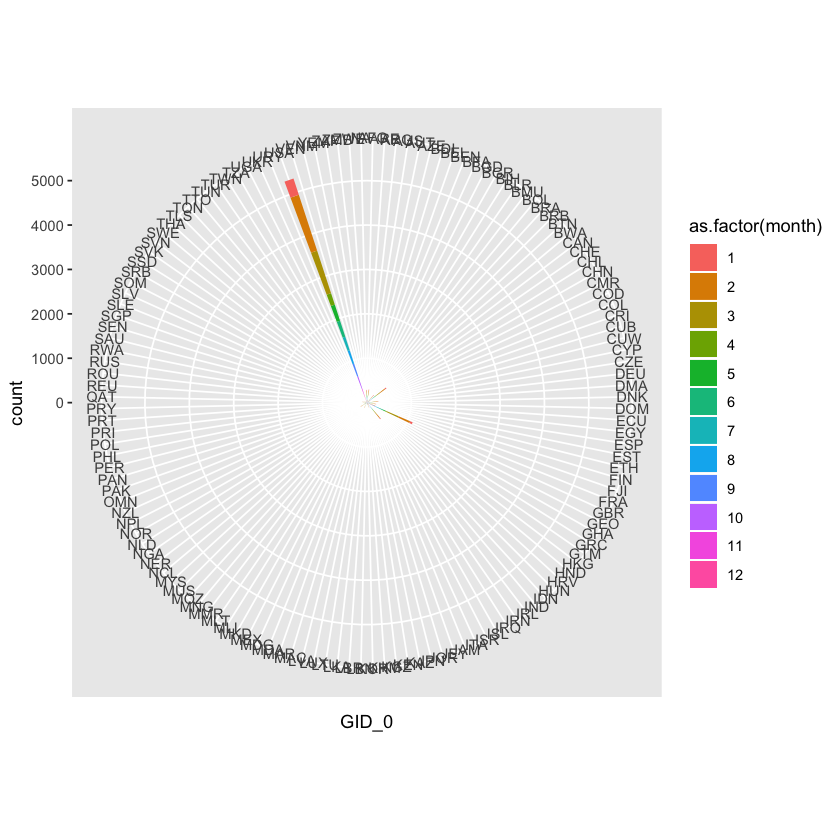

In [151]:
ggplot(data=country_perc_month)+
    geom_col(aes( x=GID_0, fill=as.factor(month), y=count))+
coord_polar()